# Lab Work 3: Classification of Image Data

## 1 Load the MNIST Data-Set
* get the data using code below
* assemble information on number of images, size of images, distribution among different classes

In [100]:
from sklearn.datasets import fetch_openml
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

After importing all needed libraries, we can load the `mnist_784` dataset and set independent variables as `X`, which are pixel values for each number built as 28x28 picture and dependent variables as `y`, which are number labels

In [101]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True)

C:\Users\tadno\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Here you can see the representation of X and y, which are pixel and label respectively

In [102]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
y.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

Here we continue to research characteristics of the dataset printing out dimensions of X and y, maximum value of each pixel and unique values from the whole y column, which are obviously numbers from 0 to 9

In [104]:
print('Dimensions of X subset: ', X.shape)
print('Maximum value for each pixel: ', np.max(X.values))
print('Unique values of target values: ', np.unique(y.values))

Dimensions of X subset:  (70000, 784)
Maximum value for each pixel:  255.0
Unique values of target values:  ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


In [105]:
print('Dimensions of y subset: ', y.shape)

Dimensions of y subset:  (70000,)


As a part of data preparation we also have to check if there are any duplicates and NaN values to preprocess them. As you can see there are not any NaN values and no duplications in X and 69990 duplicates in y, which is correct, because the other 10 values are number in range from 0 to 9 and they just repeat themselves. This shows us, that we have only 10 number digits to classify

In [106]:
print('Amount of NaN values in X:', X.isna().sum().sum())
print('Amount of NaN values in y:', y.isna().sum().sum())

Amount of NaN values in X: 0
Amount of NaN values in y: 0


In [107]:
print('Amount of duplicated values in X:', X.duplicated().sum())
print('Amount of duplicated values in y:', y.duplicated().sum())

Amount of duplicated values in X: 0
Amount of duplicated values in y: 69990


We also fetch some information on X and y dataframes like their data types, range index, amount of columns and memory usage

In [108]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel1 to pixel784
dtypes: float64(784)
memory usage: 418.7 MB


In [109]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 70000 entries, 0 to 69999
Series name: class
Non-Null Count  Dtype   
--------------  -----   
70000 non-null  category
dtypes: category(1)
memory usage: 68.9 KB


We also use `describe` function to see how many values are there and get information like IQR and mean values

In [110]:
X.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [111]:
y.describe()

count     70000
unique       10
top           1
freq       7877
Name: class, dtype: object

We check, if there are any digits more than 255 or less than 0, which would be an incorrect value, which we should have preprocess. As the result shows, that we do not have any such values, we can assume, that all the values in X are on the same scale

In [112]:
[false_digit for false_digit in X.values if any(false_digit > 255) or any(false_digit < 0)]

[]

## 2 Visualize the input data
* Display at least two images for each class in the dataset
* Show the class identity per image

We want to visualize all numbers at least twice. We use a simple algorithm for that, which goes through the X array and prints and adds the current number to the dictionary, which consists of ten key-value pairs with digits as keys and their amount as values. As soon as our dictionary reaches amount 2 for the last label with amount less than 2, we break the loop. To print the numbers we reshape them to 28x28 array with data type `uint8` and print them out with the help of `matplotlib`

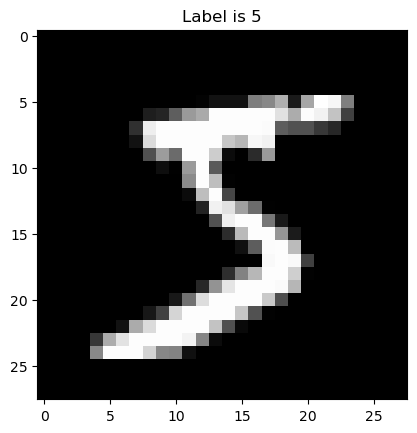

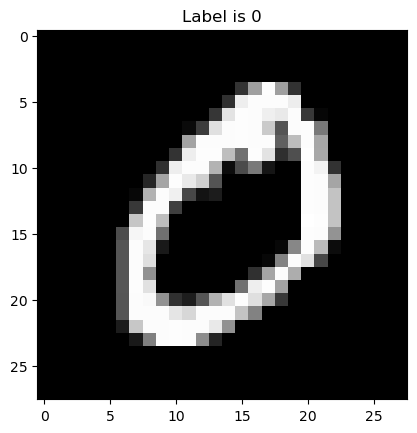

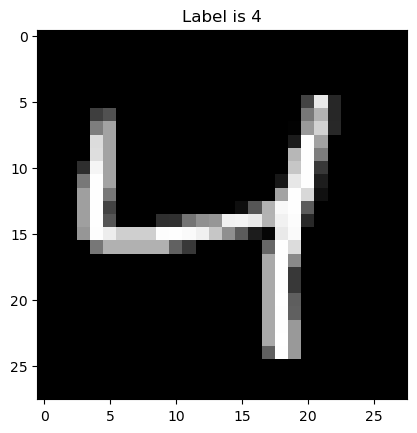

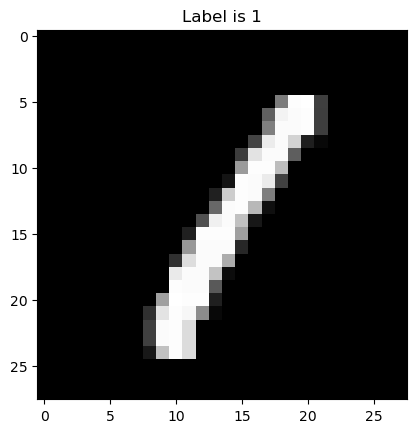

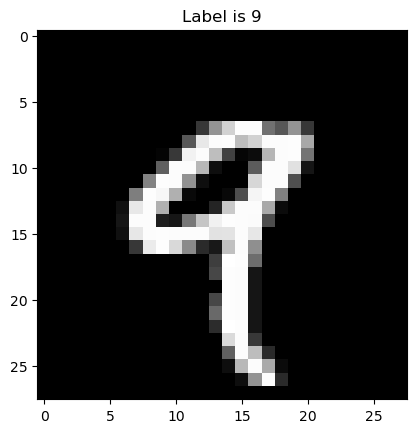

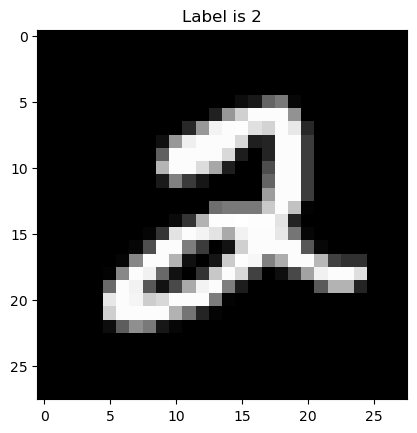

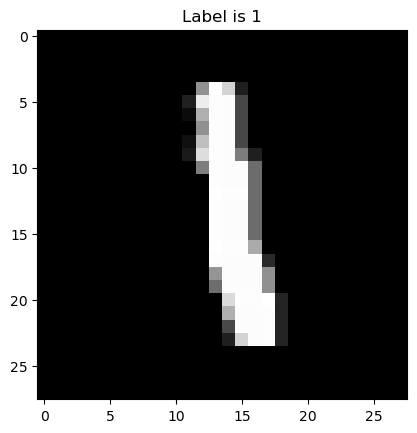

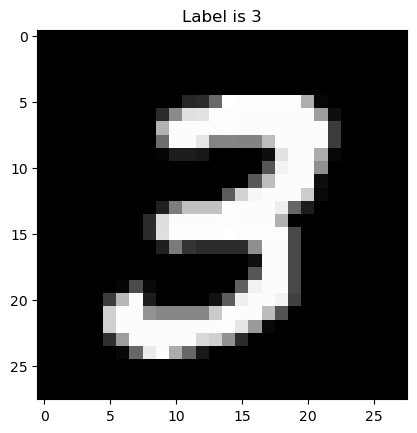

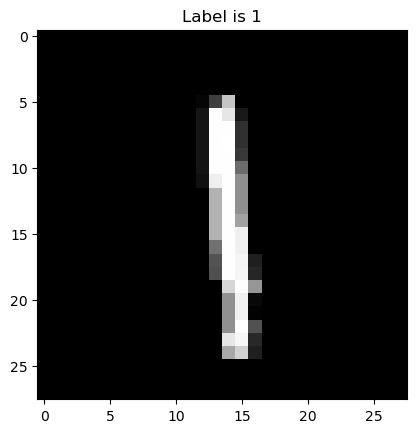

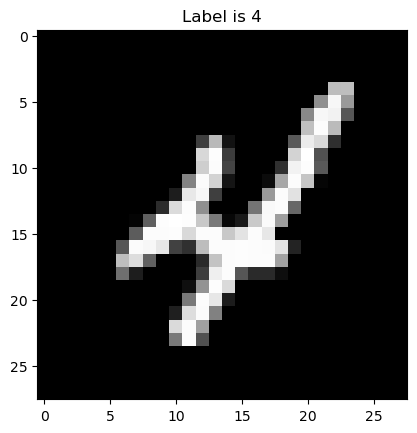

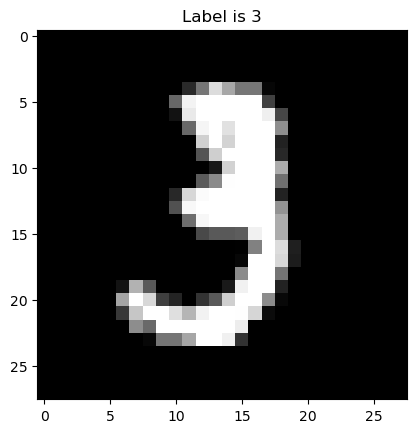

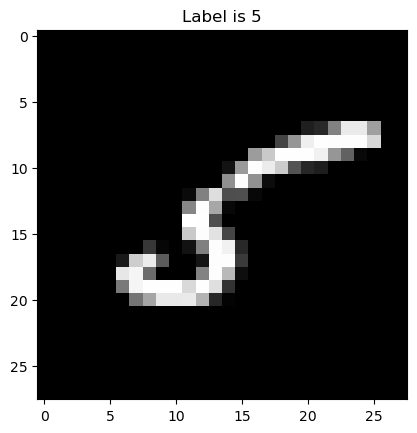

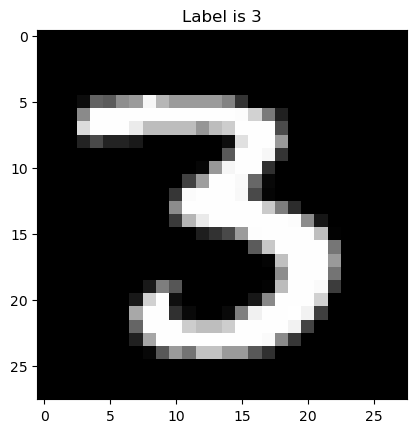

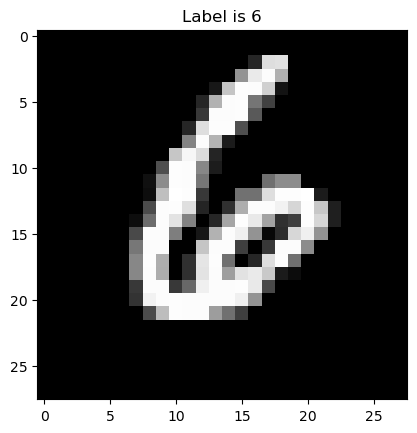

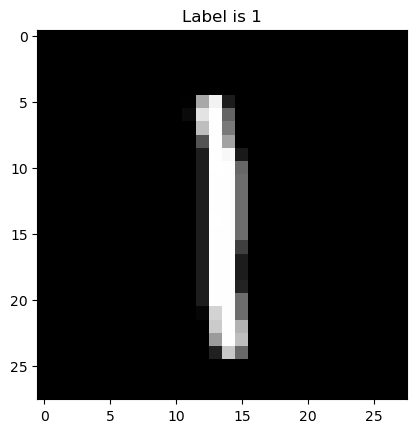

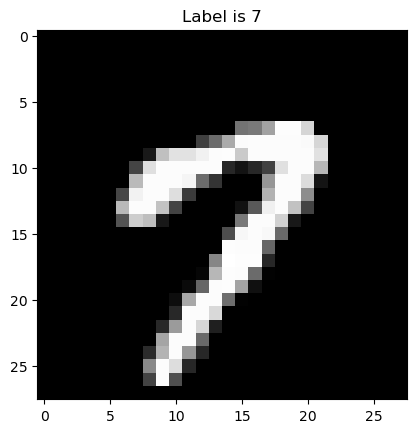

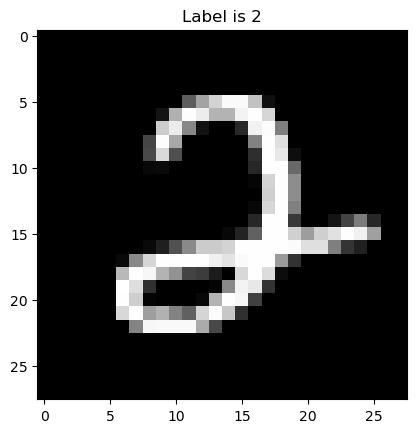

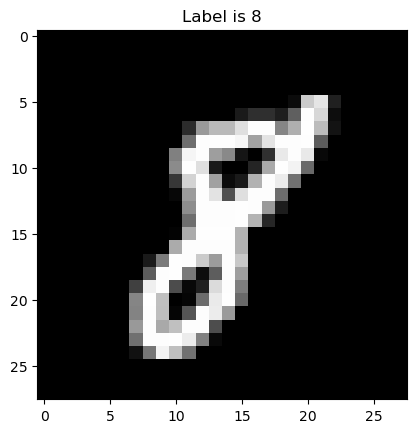

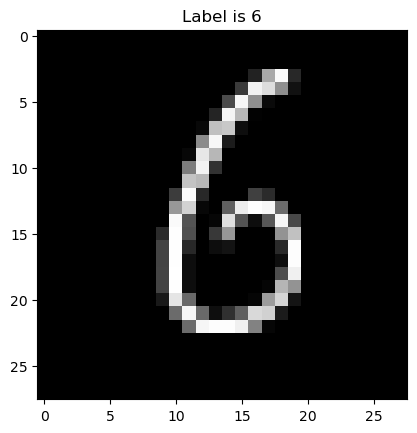

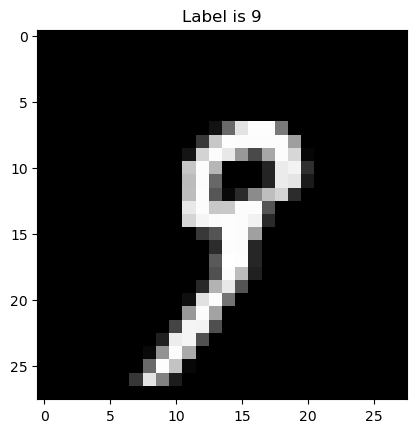

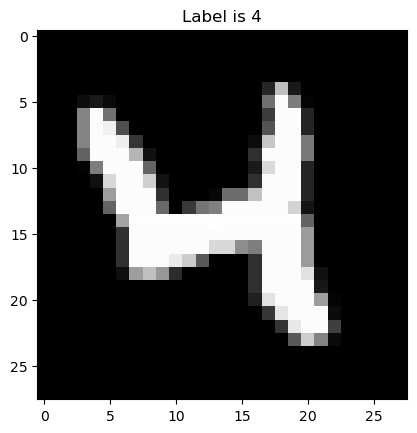

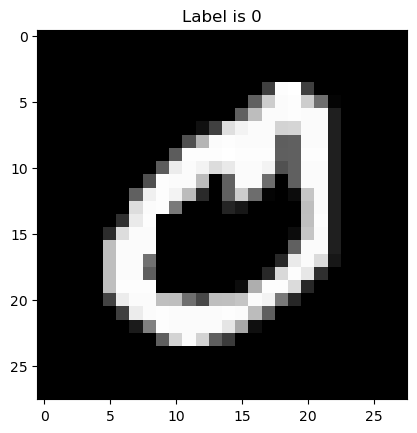

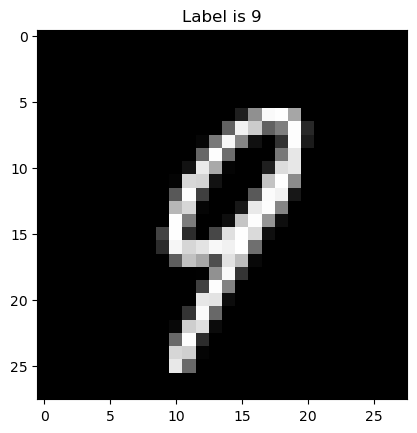

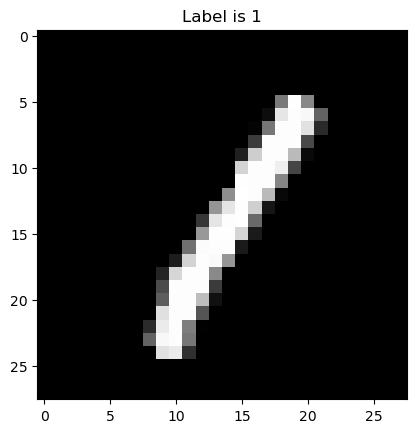

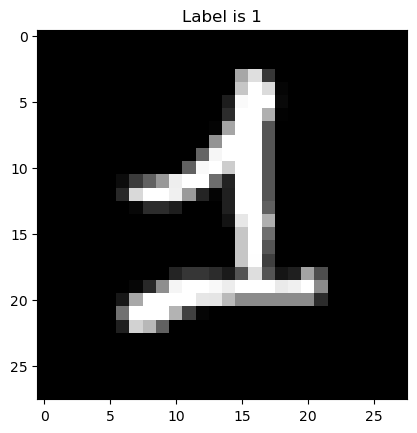

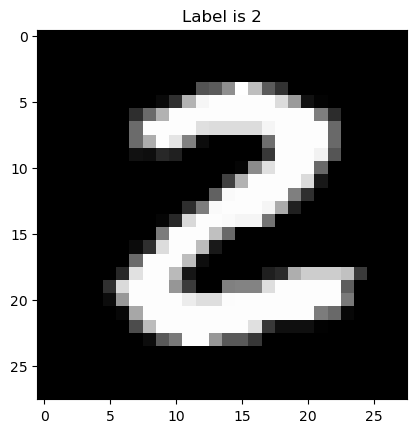

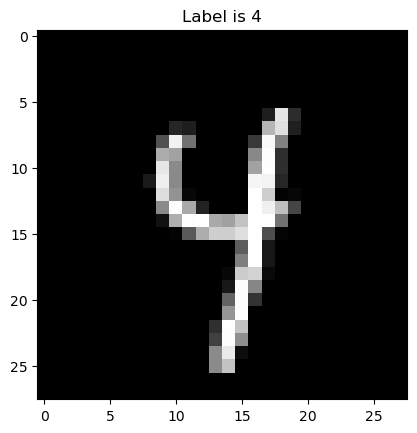

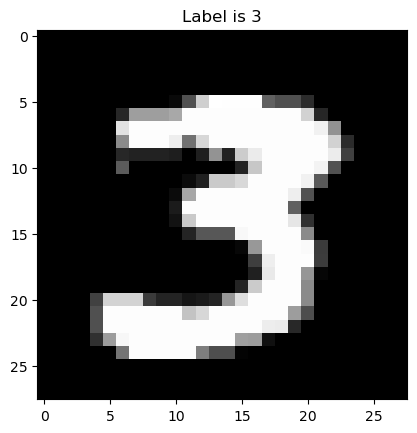

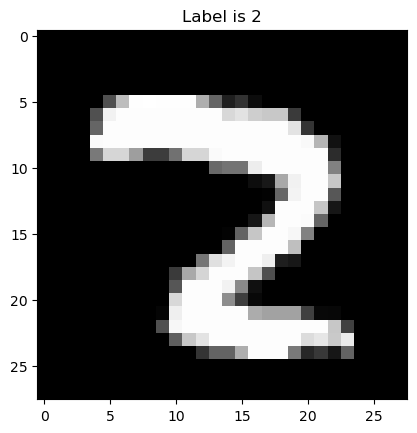

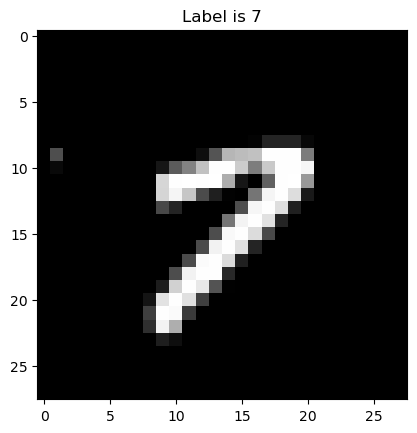

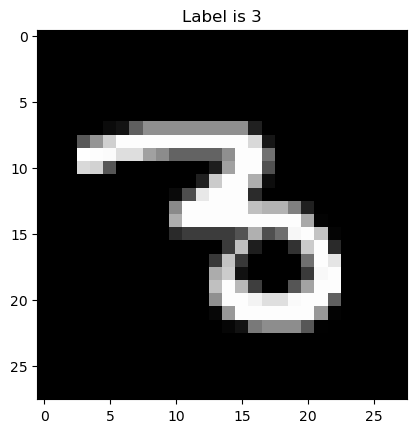

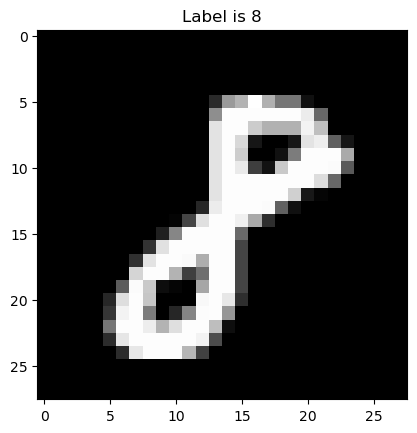

In [113]:
shown_labels = {'0': 0, '1': 0, '2': 0, '3': 0, '4': 0, '5': 0, '6': 0, '7': 0, '8': 0, '9': 0}
        
for i in range(len(X.values)):
    if all(value >= 2 for value in shown_labels.values()):
        break
    pixels = X.values[i]
    label = y.values[i]
    shown_labels[label] = shown_labels[label]+1
    pixels = np.array(pixels, dtype='uint8')
    pixels = pixels.reshape((28, 28))
    plt.title('Label is {label}'.format(label=label))
    plt.imshow(pixels, cmap='gray')
    plt.show()

In [114]:
print(shown_labels)

{'0': 2, '1': 6, '2': 4, '3': 5, '4': 4, '5': 2, '6': 2, '7': 2, '8': 2, '9': 3}


## 3 Train a k-NN Classifier and Check the Performance

### 3.1 Import the required modules for classifier and performance measurement

In [115]:
from sklearn.neighbors import KNeighborsClassifier

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

### 3.2 Train the classifier using 3-fold cross_validation 
* create a training and testing set
* train the classifer with cross_validate, check the documentation: What does cross_validate return?

We split features and labels into training and test sets setting the random state to 0 and holding it with all other classifiers to have controls over the randomness of the bootstrapping of the samples. We set test size to 25%, which is pretty reasonable and regular number which ranges between 20% and 30% depending on the project and dataset

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

Then we create some utility variables for the coming algorithms

In [118]:
neighbours_amount = range(2, 20)
best_classifier_acc = None
best_classifier_prec = None
best_acc = 0
best_prec = 0
neighbors_acc = 0
neighbors_prec = 0
accuracies = []
precisions = []

In this cell we try to find the best model for KNeighborsClassifier. For this purpose we try out multiple neighbors and keep the one with the best accuracy and precision. First, initialize `KNeighborsClassifier` starting with 2 neighbours. Then train the model with 3 fold cross validation `cv=3` setting in `scoring` that we want to set the strategy to evaluate the performance of the cross-validated model on the test set by `accuracy` and `precision macro`. After training we estimate the mean values for `accuracy` and `predicion macro` for these folds and print them out. Then we check if there was a better accuracy or precision, if so continue, otherwise set this current model as the best 

And we don't need to do feature scaling for the feature values, because they are already in one scale from 0 to 255

In [119]:
for i in neighbours_amount:
    kn_classifier = KNeighborsClassifier(n_neighbors = i)
    kn_classifier.fit(X_train, y_train)
    cv_res = cross_validate(kn_classifier, X_test, y_test, cv = 3, scoring=['accuracy', 'precision_macro'], return_train_score=False)
    acc_mean = cv_res['test_accuracy'].mean()
    prec_macro_mean = cv_res['test_precision_macro'].mean()
    print("Accuracy with", i, 'neighbors:', acc_mean)
    print("Precision (macro) with", i, 'neighbors:', prec_macro_mean)
    accuracies.append(acc_mean)
    precisions.append(prec_macro_mean)
    if (acc_mean > best_acc):
        best_acc = acc_mean
        best_classifier_acc = kn_classifier
        neighbors_acc = i
    if (prec_macro_mean > best_prec):
        best_prec = prec_macro_mean
        best_classifier_prec = kn_classifier
        neighbors_prec = i

Accuracy with 2 neighbors: 0.9421141024895826
Precision (macro) with 2 neighbors: 0.9434489778487043
Accuracy with 3 neighbors: 0.9511998756067809
Precision (macro) with 3 neighbors: 0.9517736993492831
Accuracy with 4 neighbors: 0.9484568715156317
Precision (macro) with 4 neighbors: 0.9493876680327183
Accuracy with 5 neighbors: 0.9491427033501282
Precision (macro) with 5 neighbors: 0.949955573496939
Accuracy with 6 neighbors: 0.9473712421159362
Precision (macro) with 6 neighbors: 0.9484396448882998
Accuracy with 7 neighbors: 0.9472569498706651
Precision (macro) with 7 neighbors: 0.9483294446281504
Accuracy with 8 neighbors: 0.9454284012859895
Precision (macro) with 8 neighbors: 0.9468083543395162
Accuracy with 9 neighbors: 0.943828417601139
Precision (macro) with 9 neighbors: 0.9452959424757493
Accuracy with 10 neighbors: 0.942228443711647
Precision (macro) with 10 neighbors: 0.944003004851616
Accuracy with 11 neighbors: 0.9419999669700504
Precision (macro) with 11 neighbors: 0.9438379

In [120]:
print('Best accuracy with', neighbors_acc ,'amount of neighbors')
print('Best precision with', neighbors_prec ,'amount of neighbors')

Best accuracy with 3 amount of neighbors
Best precision with 3 amount of neighbors


As you can see here, the values of accuracy and precision have a tendency to decrease, so we do not need to go on with checking other amounts of neighbors

<Axes: >

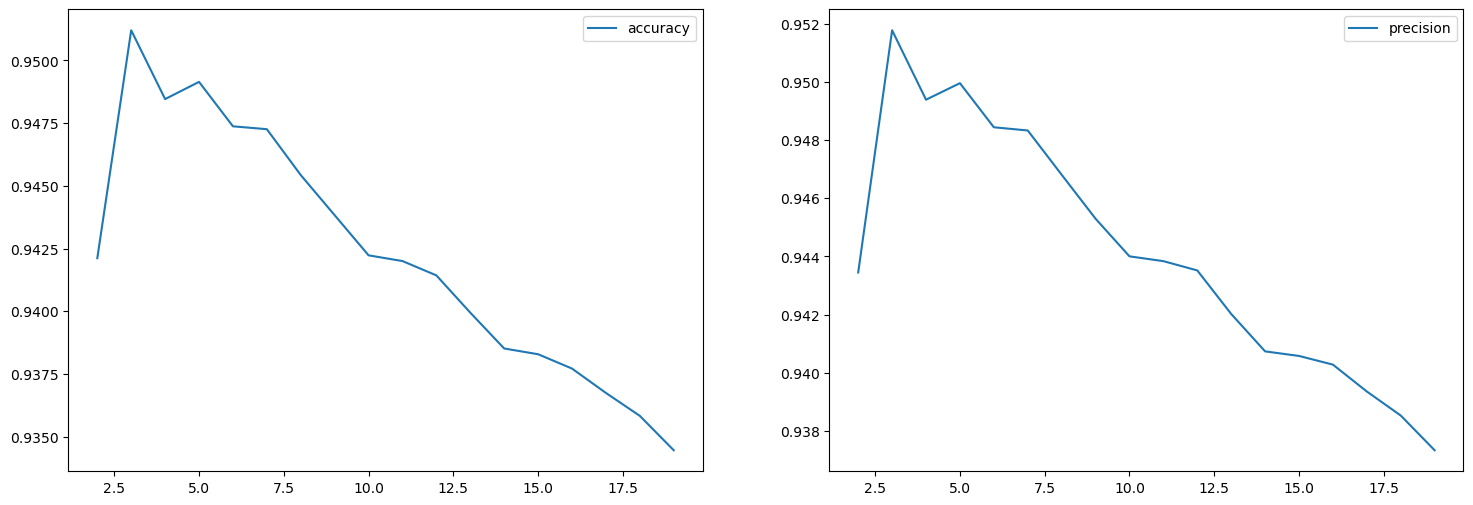

In [121]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
knn_acc_visual = pd.DataFrame(accuracies, index=neighbours_amount, columns=['accuracy'])
sns.lineplot(data=knn_acc_visual)
plt.subplot(1, 2, 2)
knn_prec_visual = pd.DataFrame(precisions, index=neighbours_amount, columns=['precision'])
sns.lineplot(data=knn_prec_visual)

`cross_validate` function returns a dictionary containing various information, and the keys like `test_accuracy`, `test_precision_macro`, and `test_recall_macro`. These keys contain the test scores for accuracy, precision (macro), and recall (macro) respectively. The values associated with each key are arrays containing the scores for each fold in the cross-validation.

As you can see, we have our winner. It is the model with 3 neighbors, which performed the best in both precision and accuracy among the classifiers in range of 1 until 9 neighbors. Now we can take this classifier and train it. So we can just take either `best_classifier_prec` or `best_classifier_acc`, which are the same classifiers, because both have the same amout of neighbors

Here is a representation of predictions and test values for comparison

In [122]:
y_pred_knc = best_classifier_acc.predict(X_test)
print(np.concatenate((y_test.values.reshape(len(y_test),1), y_pred_knc.reshape(len(y_pred_knc),1)),1))

[['0' '0']
 ['4' '4']
 ['1' '1']
 ...
 ['5' '5']
 ['9' '9']
 ['2' '2']]


### 3.3 Use the best classifier from the previuous run and check with your test set 
* Generate a classification report
* Generate a confusion matrix

We have our best classifier from the previous run, which is the one with 3 neighbors. Now we use it to show the confusion matrix, classification report and accuracy for the model by simply importing functions from `sklearn.metrics`. The accuracy for this model is very good

In [123]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test.values, y_pred_knc))
print()
print(classification_report(y_test.values, y_pred_knc))
print('Accuracy score: ', accuracy_score(y_test, y_pred_knc))

[[1701    1    1    1    1    3    7    0    0    0]
 [   0 1965    3    1    1    0    0    1    0    0]
 [  10   12 1733    3    1    1    1   19    5    1]
 [   0    4   19 1702    1   13    0    8   13    3]
 [   1    8    0    0 1621    0    1    5    2   38]
 [   5    3    1   18    1 1530   19    1    3   12]
 [   8    5    1    0    4    9 1682    0    1    0]
 [   0   24    8    1    3    0    0 1782    1   18]
 [   4   21    6   24    8   25    5    1 1600   19]
 [   3    3    2   12   15    1    1   26    2 1671]]

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1715
           1       0.96      1.00      0.98      1971
           2       0.98      0.97      0.97      1786
           3       0.97      0.97      0.97      1763
           4       0.98      0.97      0.97      1676
           5       0.97      0.96      0.96      1593
           6       0.98      0.98      0.98      1710
           7       0.97      0.97  

# 4 Train a Decision Tree Classifier and Check the Performance

Import needed library for Decision Tree Classification

In [124]:
from sklearn.tree import DecisionTreeClassifier

### 4.1 Train the classifier using 3-fold cross_validation

Here we initialize our decision tree classifier setting the criterion to `entropy` for Shannon information gain and again th random state to 0 as we did during dataset splitting. Then we train our classifier with cross validation setting the same criteria as for KNN

In [125]:
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_classifier.fit(X_train, y_train)
cv_dt = cross_validate(dt_classifier, X_test, y_test, cv = 3, scoring=['accuracy', 'precision_macro'])
dt_acc_mean = cv_dt['test_accuracy'].mean()
dt_prec_macro_mean = cv_dt['test_precision_macro'].mean()
print("Accuracy mean:", dt_acc_mean)
print("Precision (macro) mean:", dt_prec_macro_mean)

Accuracy mean: 0.8227425621245646
Precision (macro) mean: 0.820649813898366


As you can see the results leave much to be desired and is far from the result of KNN 

### 4.2 Check the performance with your test set

Here are our test and predicted values for the comparison

In [126]:
dt_y_pred = dt_classifier.predict(X_test)
print(np.concatenate((y_test.values.reshape(len(y_test), 1), dt_y_pred.reshape(len(dt_y_pred), 1)), 1))

[['0' '0']
 ['4' '4']
 ['1' '1']
 ...
 ['5' '1']
 ['9' '9']
 ['2' '2']]


Now we use predicted and test results to show the confusion matrix, classification report and accuracy for the model as we did for KNN. The accuracy is worse than in KNN

In [127]:
print(confusion_matrix(y_test.values, dt_y_pred))
print()
print(classification_report(y_test.values, dt_y_pred))
print('Accuracy score: ', accuracy_score(y_test, dt_y_pred))

[[1595    4   18   14    8   17   21    6   20   12]
 [   0 1889   15   11    7    8    6   19   10    6]
 [  22   17 1495   53   29   12   41   53   41   23]
 [   3   15   50 1487   13   75   14   26   51   29]
 [  11   10   17    5 1456    9   33   20   27   88]
 [  22   11   14   77   18 1316   39   11   59   26]
 [  20   16   26    4   25   30 1554    6   23    6]
 [   4   18   51   42   24   18    2 1623   14   41]
 [  15   29   37   48   41   42   26   17 1419   39]
 [  12    6   13   37   87   33    9   44   27 1468]]

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      1715
           1       0.94      0.96      0.95      1971
           2       0.86      0.84      0.85      1786
           3       0.84      0.84      0.84      1763
           4       0.85      0.87      0.86      1676
           5       0.84      0.83      0.83      1593
           6       0.89      0.91      0.90      1710
           7       0.89      0.88  

## 5 Improve with random forests

Let's improve this with `Random Forest Classifiers`, which are basically a team of Decision Trees working together. In order to do this we do almost the same as in Decision tree, except we also should set the number of estimators - number of trees in a forest(number of decision trees in team), which we set to 10, because bigger numbers are time efficient

In [128]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_classifier.fit(X_train, y_train)
rf_cv = cross_validate(rf_classifier, X_test, y_test, cv = 3, scoring=['accuracy', 'precision_macro'])
rf_acc_mean = rf_cv['test_accuracy'].mean()
rf_prec_macro_mean = rf_cv['test_precision_macro'].mean()
print("Accuracy mean:", rf_acc_mean)
print("Precision (macro) mean:", rf_prec_macro_mean)

Accuracy mean: 0.9109143275790892
Precision (macro) mean: 0.9102304217950241


As you can see, our numbers got much better. Here are test and predicted values for comparison

In [129]:
rf_y_pred = rf_classifier.predict(X_test)
print(np.concatenate((y_test.values.reshape(len(y_test), 1), rf_y_pred.reshape(len(rf_y_pred), 1)), 1))

[['0' '0']
 ['4' '4']
 ['1' '1']
 ...
 ['5' '5']
 ['9' '9']
 ['2' '2']]


Now we use predicted and test results to show the confusion matrix, classification report and accuracy for the model as we did for KNN and DTC. The accuracy is worse than in KNN, but better than DTC

In [130]:
print(confusion_matrix(y_test.values, rf_y_pred))
print()
print(classification_report(y_test.values, rf_y_pred))
print('Accuracy score: ', accuracy_score(y_test, rf_y_pred))

[[1671    0    8    3    2    7    7    2   13    2]
 [   0 1947    5    4    0    2    2    3    5    3]
 [  11    7 1702   11    9    3    8   16   16    3]
 [   5    6   32 1634    3   27    4   18   29    5]
 [   4    2    9    2 1579    3   10    5    9   53]
 [  15    8   12   50    8 1456   15    4   13   12]
 [  14    4    7    1    7   17 1652    0    8    0]
 [   5   15   32    6   15    2    0 1726    9   27]
 [   3   18   29   25   12   20    9    2 1575   20]
 [   5    4    8   31   53   17    4   35   12 1567]]

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1715
           1       0.97      0.99      0.98      1971
           2       0.92      0.95      0.94      1786
           3       0.92      0.93      0.93      1763
           4       0.94      0.94      0.94      1676
           5       0.94      0.91      0.93      1593
           6       0.97      0.97      0.97      1710
           7       0.95      0.94  

## 6 Further improvement: Gradient Boosting (Random Forests)

Let's try to improve the result even more. We use `Gradient Boosting` for that purpose. We try a bit different approach and to find the best hyperparameters for Gradient Boosting we use `Grid Search`. We created `param_grid` as the set of parameters to find the best combination from. We initialize GradientBoostingClassifier first and then perform grid search. Then we get the best hyperparameters and best model from that search. Taking those values we put them to cross validate  as we did with other classifiers

In [133]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)
gb_y_pred = gb_classifier.predict(X_test)
print('Accuracy score: ', accuracy_score(y_test, gb_y_pred))
param_grid = {
    'n_estimators': [10, 15, 20],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=3, scoring=['accuracy', 'precision_macro'], refit='accuracy')
grid_search.fit(X_train, y_train)

Accuracy score:  0.9403428571428571


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [10, 15, 20]},
             refit='accuracy', scoring=['accuracy', 'precision_macro'])

Then we again take the best classifier and use cross validation on it, because its primary purpose is to provide a robust estimate of the model's performance on unseen data. The goal is to simulate how well the model is likely to generalize to new, unseen samples by evaluating its performance across different subsets of the training data. Then we also print out an average value for accuracy and precision

In [134]:
best_params = grid_search.best_params_
best_gb_classifier = grid_search.best_estimator_

gb_cv = cross_validate(best_gb_classifier, X_test, y_test, cv = 3, scoring=['accuracy', 'precision_macro'])
gb_acc_mean = gb_cv['test_accuracy'].mean()
gb_prec_macro_mean = gb_cv['test_precision_macro'].mean()
print("Accuracy mean:", gb_acc_mean)
print("Precision (macro) mean:", gb_prec_macro_mean)

Accuracy mean: 0.923999780740691
Precision (macro) mean: 0.9237208110319206


As you can see the result is a bit worse and almost the same, but still not the best. Here are test and predicted values for comparison

In [135]:
gb_y_pred = best_gb_classifier.predict(X_test)
print(np.concatenate((y_test.values.reshape(len(y_test), 1), gb_y_pred.reshape(len(gb_y_pred), 1)), 1))

[['0' '0']
 ['4' '4']
 ['1' '1']
 ...
 ['5' '5']
 ['9' '9']
 ['2' '2']]


Now we use predicted and test results to show the confusion matrix, classification report and accuracy for the model as we did for KNN and DTC and RFC. The accuracy is worse than in KNN, but better than DTC and almost equal to RFC

In [136]:
print(confusion_matrix(y_test.values, gb_y_pred))
print()
print(classification_report(y_test.values, gb_y_pred))
print('Accuracy score: ', accuracy_score(y_test, gb_y_pred))

[[1675    0    3    1    5    5   10    0   15    1]
 [   0 1930    8    7    1    3    1    6   10    5]
 [   1    5 1681   21   22    3   10   15   25    3]
 [   3   10   42 1626    2   23    2   14   27   14]
 [   3    3   12    2 1574    1    7    9   10   55]
 [   4    8    7   24    4 1481   22    5   18   20]
 [  15    4    7    0   11   23 1632    1   17    0]
 [   5   11   30   10   13    7    0 1708    8   45]
 [   4   12   18   20   10   14    8    5 1590   32]
 [   4    3    7   26   57   10    1   32   16 1580]]

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1715
           1       0.97      0.98      0.98      1971
           2       0.93      0.94      0.93      1786
           3       0.94      0.92      0.93      1763
           4       0.93      0.94      0.93      1676
           5       0.94      0.93      0.94      1593
           6       0.96      0.95      0.96      1710
           7       0.95      0.93  

So even with the seach of optimal hyperparamters we couldn't make a better classifier than random forest. Random Forest is likely to be a more suitable choice between RandomForestClassifier and GradientBoosting. Random Forest can handle high-dimensional data well, and each decision tree in the ensemble can learn different aspects of the data. It is less prone to overfitting and requires less hyperparameter tuning compared to Gradient Boosting. Random Forest is computationally efficient, which can be beneficial when dealing with a dataset like MNIST. Gradient Boosting, especially with decision trees as weak learners, has the potential to capture complex patterns in the data. However, it often requires more hyperparameter tuning and computational resources. The strengths of Gradient Boosting, such as capturing intricate relationships, might not be fully utilized in the case of MNIST where the patterns are relatively straightforward.

### Conclusion

In conclusion, we can say that our first classifier KNN Classifier has shown the best performance among all of the tested classifiers. However, we can also point out that as we proceeded the tasks 4 until 6, we have gotten better and better results, which shows, that there is not any rule how to beforehand know which classifier to use until we try them all out, because classifiers perform differently depending on data we provide and use case we are working on.